# Auto Model Retrain 
I am using this Notebook to come up with a POC for a Automatic Model retraining and Serving section for the the stock app.

### Mag 7 Stocks
Only Interested in using hte Magnificent 7 stocks for now as I think I will need a model per stock (think fine tuning here maybe in the future if automl doesnt pull through). 
So that's: 
- AAPL
- AMZN
- GOOG 
- MSFT 
- META
- NVDA
- TSLA 

In [4]:
#!pip install yfinance numpy pandas scikit-learn tensorflow xgboost matplotlib


In [5]:
import yfinance as yf
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor
import joblib

## Code

In [6]:
# Define stock tickers
magnificent_7 = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "NVDA"]

In [7]:
# Ensure models directory exists
if not os.path.exists("models"):
    os.makedirs("models")



### (Reused Code)


In [8]:
# Fetch stock data 
def fetch_stock_data(ticker, start_date="2020-01-01", end_date="2024-12-31"):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Prepare data for LSTM
def prepare_lstm_data(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Train LSTM model
def train_lstm(X_train, y_train, units=50, dropout_rate=0.2, epochs=20):
    model = Sequential([
        LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)
    return model

# Train XGBoost model
def train_xgboost(X_train, y_train):
    model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
    model.fit(X_train, y_train)
    return model

# Process each stock
for stock in magnificent_7:
    print(f"Processing stock: {stock}")
    # Fetch data
    stock_data = fetch_stock_data(stock)
    close_prices = stock_data["Close"].values.reshape(-1, 1)

    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(close_prices)

    # Prepare data
    look_back = 30
    X, y = prepare_lstm_data(scaled_data, look_back)
    X_train, y_train = X[:-30], y[:-30]
    X_test, y_test = X[-30:], y[-30:]

    # Train LSTM
    X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    lstm_model = train_lstm(X_train_lstm, y_train)

    # Train XGBoost
    xgb_model = train_xgboost(X_train.reshape(X_train.shape[0], -1), y_train)

    # Save models and scaler
    lstm_model.save(f"models/{stock}_lstm.h5")
    joblib.dump(xgb_model, f"models/{stock}_xgb.pkl")
    joblib.dump(scaler, f"models/{stock}_scaler.pkl")

    print(f"Models for {stock} saved!")


Processing stock: AAPL


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0429  
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 16/20
38/38 ━━━━━━━━━━

Models for AAPL saved!
Processing stock: MSFT


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0846  
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 16/20
38/38 ━━━━━━━━━━

Models for MSFT saved!
Processing stock: AMZN


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0811 
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 16/20
38/38 ━━━━━━━━━━━

Models for AMZN saved!
Processing stock: GOOGL


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0604  
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021   
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 16/20
38/38 ━━━━━━━

Models for GOOGL saved!
Processing stock: META


[*********************100%***********************]  1 of 1 completed
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0473  
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 16/20
38/38

Models for META saved!
Processing stock: TSLA


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100  
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 16/20
38/38 ━━━━━━━━━━

Models for TSLA saved!
Processing stock: NVDA


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0476 
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017    
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021   
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018   
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011   
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016   
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014   
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011   
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012   
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012   
E

Models for NVDA saved!


## Load the saved Models and Plot for fun

Loading models for: AAPL


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


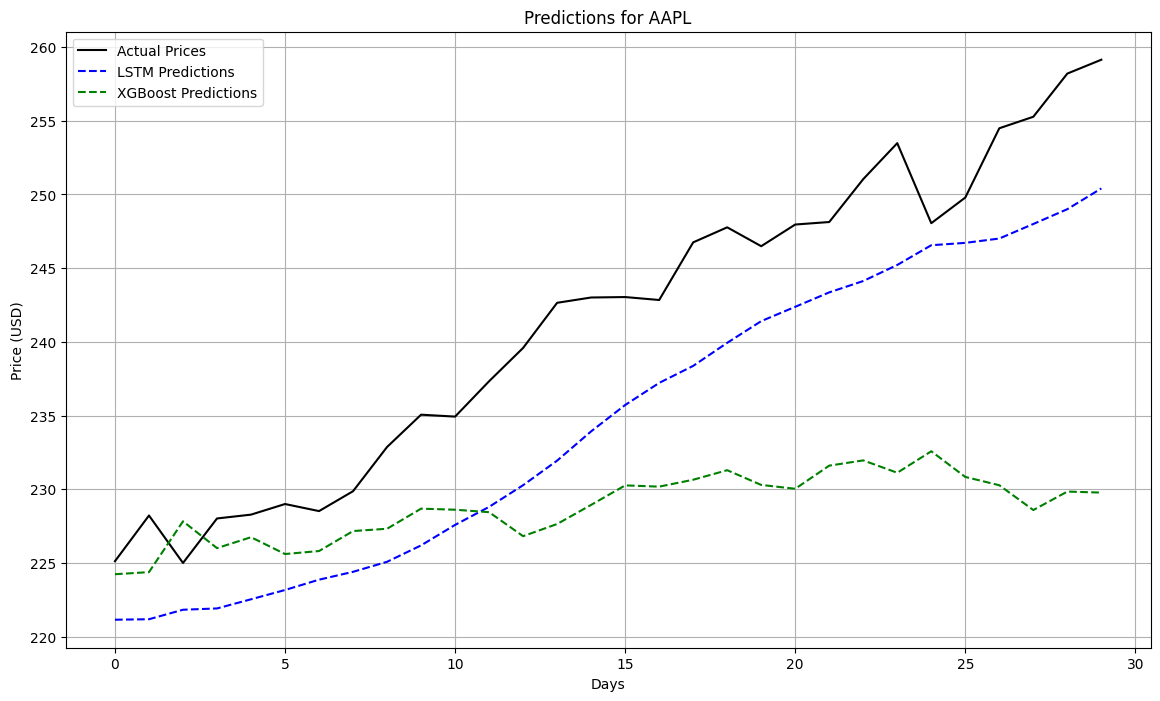

Loading models for: MSFT


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


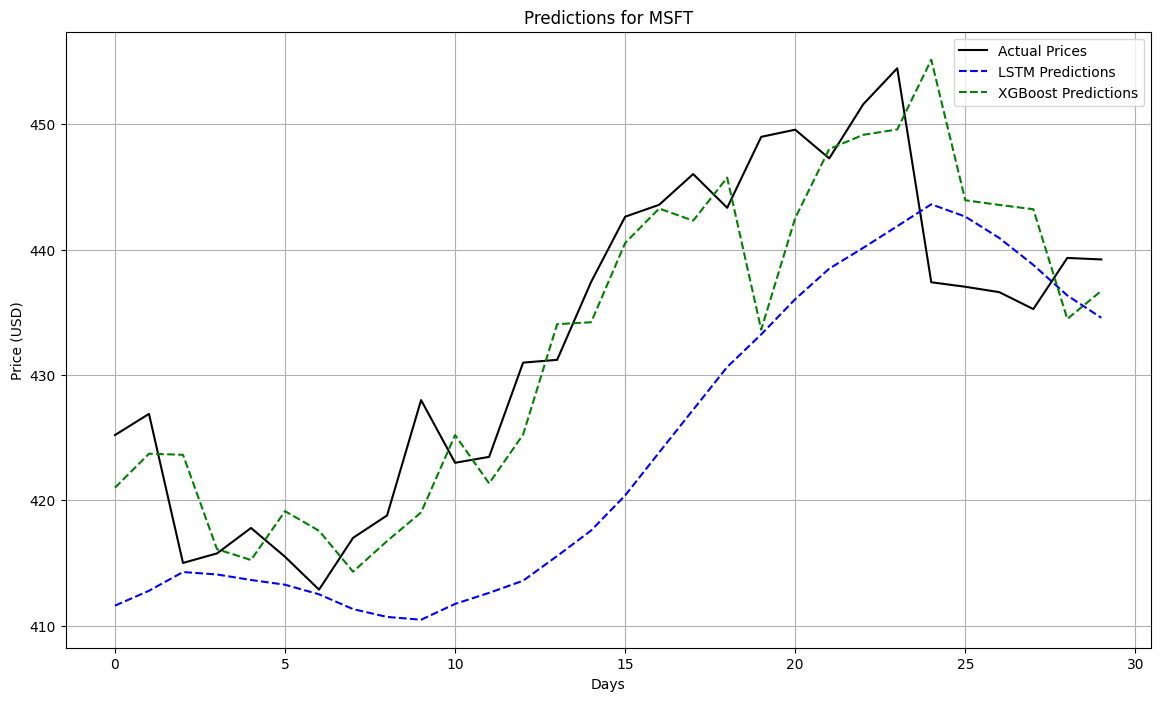

Loading models for: AMZN


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


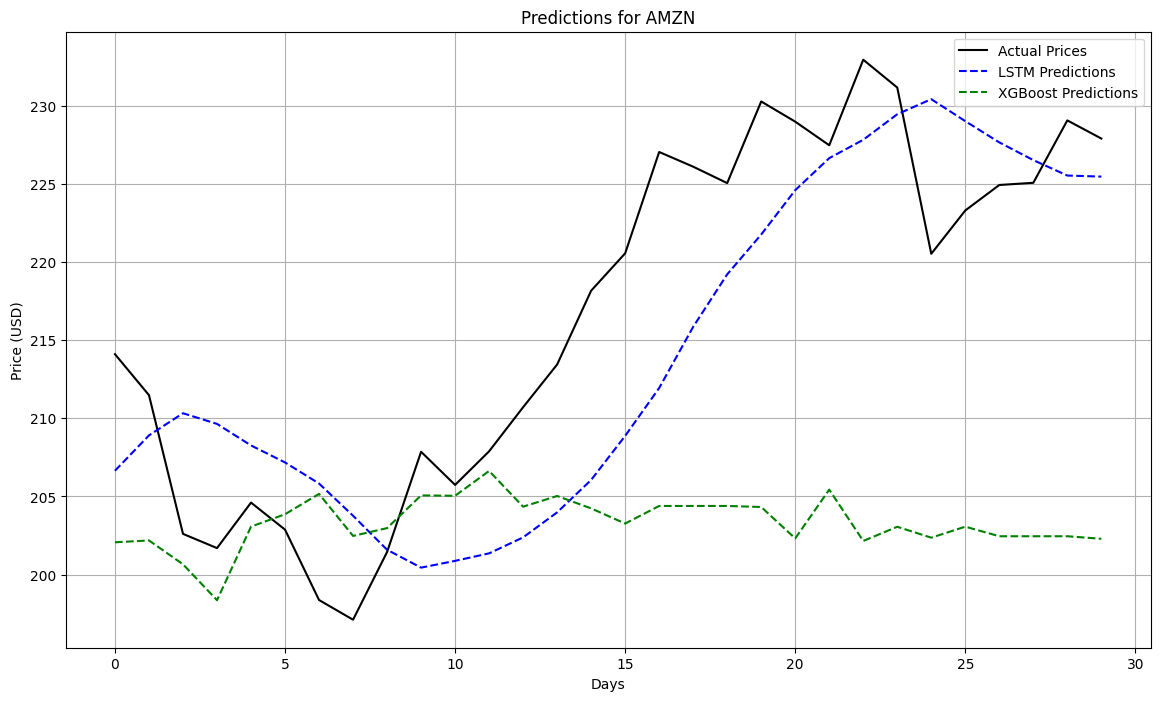

Loading models for: GOOGL


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


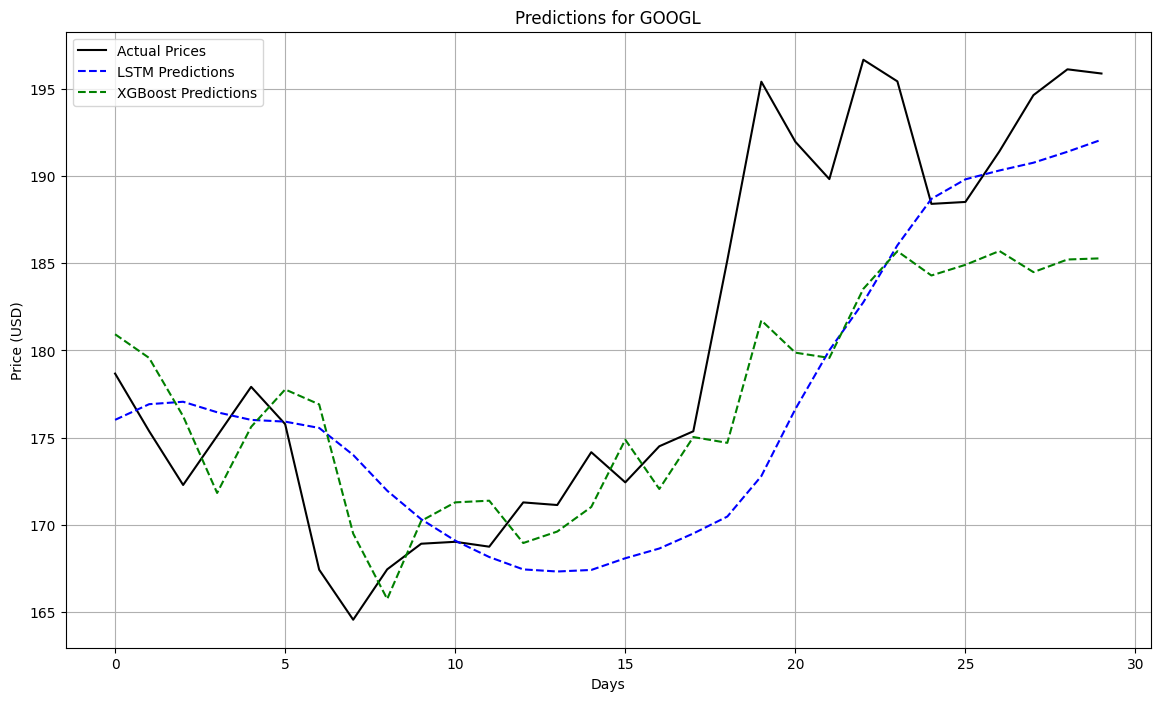

Loading models for: META


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


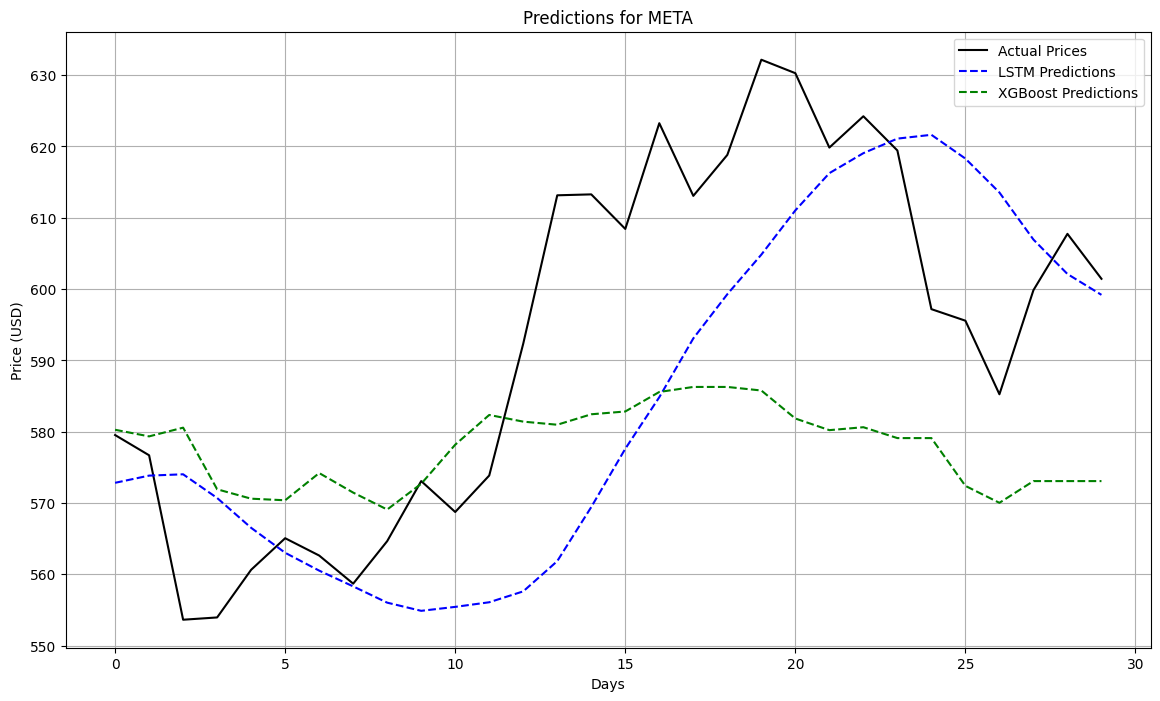

Loading models for: TSLA


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


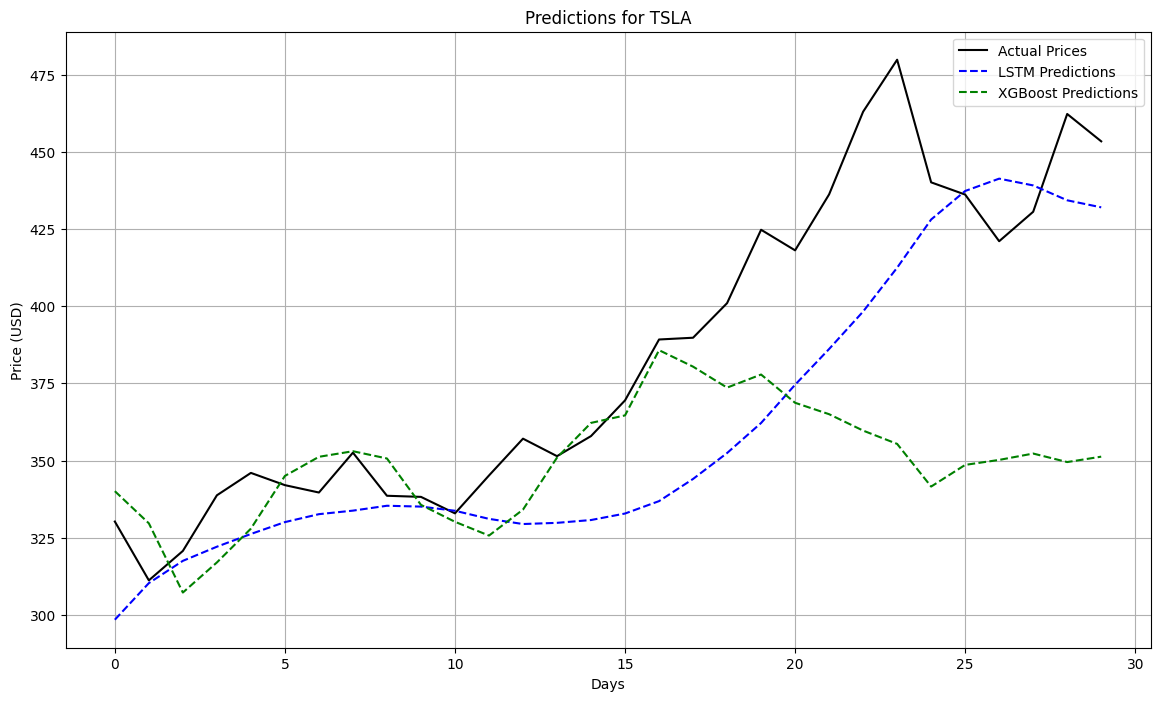

Loading models for: NVDA


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


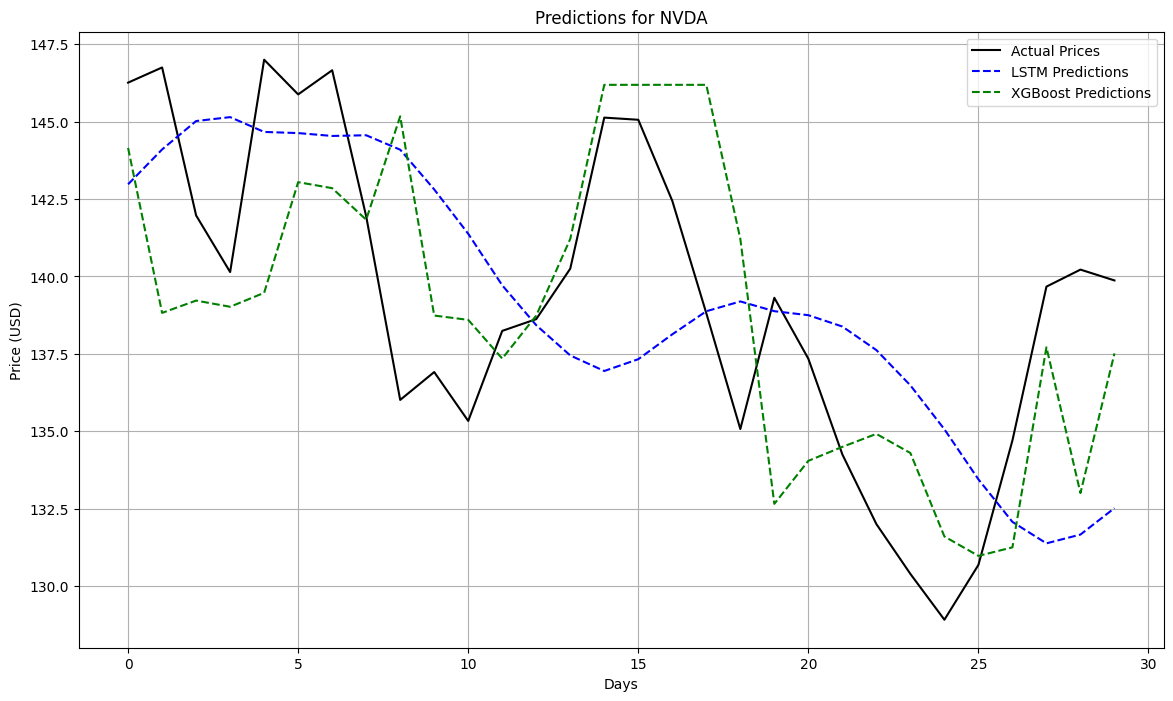

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
#import joblib

# Directory containing models
models_dir = "models"

# Look-back period (same as during training)
look_back = 30

# Load and predict for each stock
for stock in magnificent_7:
    print(f"Loading models for: {stock}")

    # Load scaler
    scaler = joblib.load(f"{models_dir}/{stock}_scaler.pkl")

    # Load LSTM model
    lstm_model = load_model(f"{models_dir}/{stock}_lstm.h5")

    # Load XGBoost model
    xgb_model = joblib.load(f"{models_dir}/{stock}_xgb.pkl")

    # Fetch stock data
    stock_data = fetch_stock_data(stock)
    close_prices = stock_data["Close"].values.reshape(-1, 1)

    # Scale data
    scaled_data = scaler.transform(close_prices)

    # Prepare data for prediction
    X, y = prepare_lstm_data(scaled_data, look_back)
    X_test_lstm = X[-30:].reshape(-1, look_back, 1)  # For LSTM
    X_test_xgb = X[-30:].reshape(-1, look_back)      # For XGBoost

    # Make predictions
    lstm_predictions = lstm_model.predict(X_test_lstm).flatten()
    xgb_predictions = xgb_model.predict(X_test_xgb)

    # Inverse transform predictions
    lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()
    xgb_predictions = scaler.inverse_transform(xgb_predictions.reshape(-1, 1)).flatten()
    actual_prices = scaler.inverse_transform(y[-30:].reshape(-1, 1)).flatten()

    # Plot results
    plt.figure(figsize=(14, 8))
    plt.plot(actual_prices, label="Actual Prices", color="black")
    plt.plot(lstm_predictions, label="LSTM Predictions", color="blue", linestyle="dashed")
    plt.plot(xgb_predictions, label="XGBoost Predictions", color="green", linestyle="dashed")
    plt.title(f"Predictions for {stock}")
    plt.xlabel("Days")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()
